# LASSO Regression In-Class Exercise

In this exercise, we will see how to use LASSO for pitch detection and noise removal in audio.

We load the following packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load the Data

The data is taken from a sample of about 20 ms of audio from a viola.  I have already pre-processed the data.  You can load it with the following command.  The value `t` is the time (in seconds) and `y` is the sample of audio (this is a mono recording).  Noise has been artificially added to the sample.

In [2]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit05_lasso/viola_sample.p'
fn_dst = 'viola_sample.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    t,y = pickle.load(fp)

File viola_sample.p is already downloaded


Plot the data `y` vs. `t`.  

(800,)
(800,)


(0.0, 0.018117913832199545)

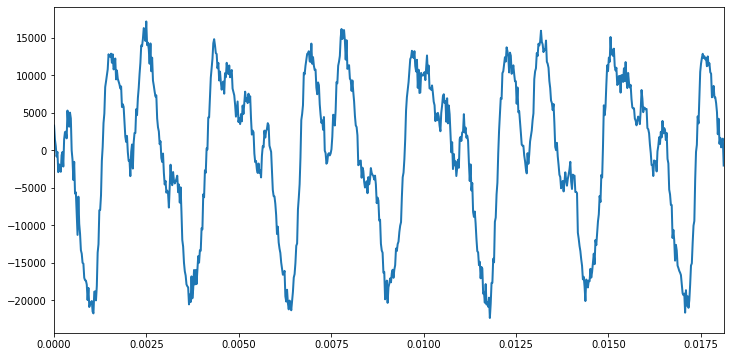

In [7]:
# TODO
print(t.shape)
print(y.shape)
t_min=np.min(t)
t_max=np.max(t)
plt.figure(figsize=(12,6))
plt.plot(t, y, linewidth=2)
plt.xlim([t_min, t_max])

## Creating Features for a Sinusoidal Model

We will try to fit a model of the form:

    y[i] = \sum_j a[j]*sin(2*pi*freq[j]*t[i]) + b[j]*cos(2*pi*freq[j]*t[i])

That is, `y[i]` is a sum of sinusoids.  This is a common model for audio signals since an instrument, such as a viola, produces discrete tones.  

This model is non-linear in the frequency parameters.  So, instead of trying to find the frequencies, we will fix a large number of frequencies and then require that the coefficients `a[j]` and `b[j]` are mostly sparse.  

We will use the following vector of frequencies.  This vector includes frequencies on the muscial scale as well as frequencies between the musical notes.

In [12]:
freq = 55*2**(np.arange(5*96)/96)
print(freq.shape)

(480,)


To fit the sinusoidal model, we will write a function to map the values `t` to 
the `sin` and `cos` features.  Finish the function `transform` that creates matrices:

    Xcos[i,j] = np.cos(2*np.pi*t[i]*freq[j])
    Xsin[i,j] = np.sin(2*np.pi*t[i]*freq[j])
    X = np.hstack((Xcos,Xsin))
    
So, if `freq` is length `d`, there will `2*d` features.  You can try to create the matrices using python broadcasting if you want to avoid a for loop.    

In [9]:
def transform(t,freq):
    # TODO
    Xcos = np.cos(t[:,None]*freq[None,:]*2*np.pi)
    Xsin = np.sin(t[:,None]*freq[None,:]*2*np.pi)
    
    X = np.hstack((Xcos,Xsin))    
    return X

Split the data `t` and `y` into training and test.  Use approximately 50% for each set.

In [10]:
from sklearn.model_selection import train_test_split

# TODO
ttr, tts, ytr, yts = train_test_split(t,y, test_size=0.5)

Transform the `ttr`, `tts` into `Xtr` and `Xts`.

In [11]:
# TODO
Xtr = transform(ttr, freq)
Xts = transform(tts, freq)

print(Xtr.shape)
print(Xts.shape)

(400, 960)
(400, 960)


## Use LASSO to Find the Frequencies

We can now use LASSO regression to find the model
* Use LASSO regression with `alpha=500` to fit the model.  
* Find the R^2-score on the test data.
* Plot the predicted value of `y` for `t in [0,0.02]`.

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# TODO
regr = Lasso(alpha=500)
regr.fit(Xtr, ytr)

yhat = regr.predict(Xts)
Rsq = r2_score(yts, yhat)
print(f"The R2 score is: {Rsq}")

The R2 score is: 0.9383072258758322


(0.0, 0.018117913832199545)

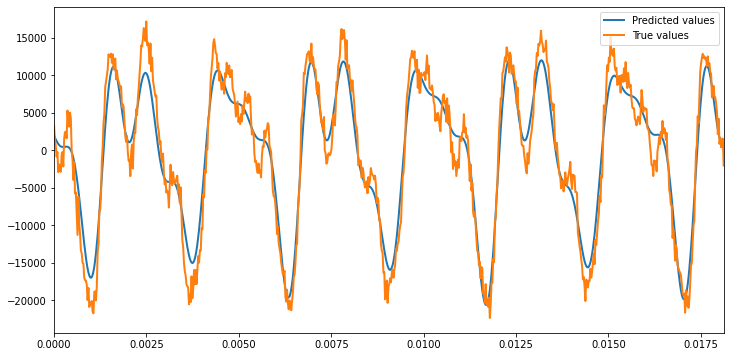

In [36]:
All_Xts = transform(t, freq)
new_y = regr.predict(All_Xts)
plt.figure(figsize=(12,6))
plt.plot(t, new_y, linewidth=2, label="Predicted values")
plt.plot(t, y, linewidth=2, label="True values")
plt.legend()
plt.xlim([t_min, t_max])

Recall that you can find the coefficient in the model via `w = regr.coef_`.  If `freq` has `d` terms, then `w` will have `2*d` terms.
* Split the coefficients `w` into `a` and `b`, the terms for the `cos` and `sin` features.
* Plot `a` and `b` using `plt.stem`.
* Which frequencies is dominant in this track?


(960,)
(480,)


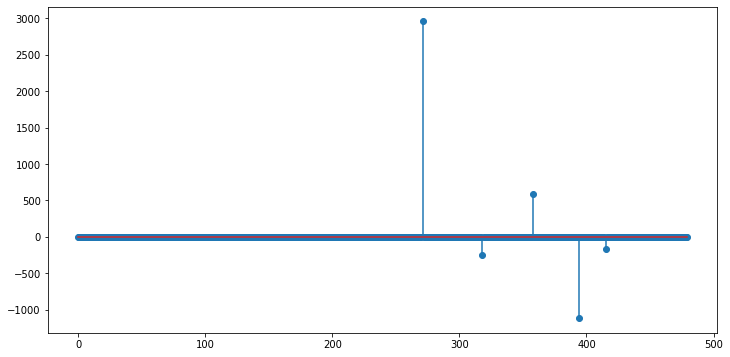

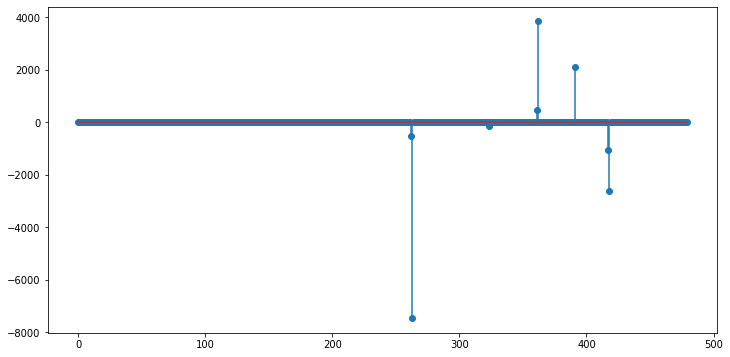

In [62]:
# TODO
w = regr.coef_
print(w.shape)
a = w[:len(freq)]
b = w[len(freq):]
plt.figure(figsize=(12,6))
plt.stem(a)

plt.figure(figsize=(12,6))
plt.stem(b)

print(freq.shape)

Still have time...
* Find the optimal `alpha` using cross-validation